# MIE1624 - Logistic Regression

In this notebook we explore prediction tasks where the response variable is categorical instead of numeric and look at a common classification technique known as logistic regression. We apply this technique to a data_set containing survival data for the passengers of the Titanic.

As part of the analysis, we will be doing the following:
Data extraction : we'll load the dataset and have a look at it.
Cleaning : we'll fill in some of the missing values.
Plotting : we'll create several charts that will (hopefully) help identify correlations and other insights

The dataset and more information regarding this dataset, including more tutorials can be found here: https://www.kaggle.com/c/titanic

### Install Relevant Libraries

In [1]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

### Import Relevant Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# The following line is needed to show plots inline in notebooks
%matplotlib inline 

## Read in Data

In [3]:
trainDF = pd.read_csv('Titanic_train.csv')
testDF = pd.read_csv('Titanic_test.csv')

## General Information of Imported Data

First, let's have a look at our data:

### Training Data

In [4]:
trainDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
trainDF.describe()

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Testing Data

In [7]:
testDF.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
testDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
testDF.describe()

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,NaN,0.000000,0.000000,NaN
50%,1100.500000,3.000000,NaN,0.000000,0.000000,NaN
75%,1204.750000,3.000000,NaN,1.000000,0.000000,NaN
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Above, the **survived** column from the training set is the taret/dependent/response variable. A score of 1 means the passenger survived, and a score of 0 means the passenger died.

There are also various features (variables) that describe each passenger:

- PassengerID: ID assigned to traveller on boat
- Pclass: The class of the passenger, either 1, 2, or 3
- Name: Name of the passenger
- Sex: Sex of the passenger
- Age: Age of the passenger
- SibSp: Number of siblings/spouses travelling with the passenger
- Parch: Number of parents/children travelling with the passenger
- Ticket: The ticket number of the passenger
- Fare: The ticket fare of the passenger
- Cabin: The cabin number of the passenger
- Embarked: The port of embarkation, either S, C, or Q (C = Cherbourg, Q = Queenstown, and S = Southhampton)

## Data Exploration

First, lets look at the number of people that survived.

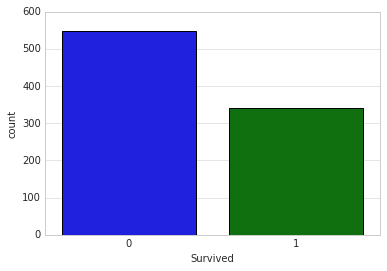

In [10]:
sns.countplot(x='Survived',data=trainDF)

Most people did not survive.

Let's look at this even further by looking at the number of people that survived by sex.

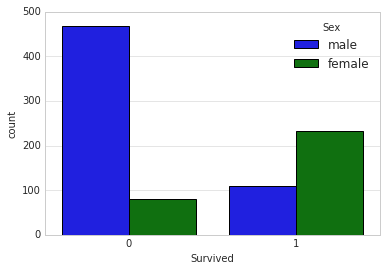

In [11]:
sns.countplot(x='Survived', hue='Sex', data=trainDF)

Here we can see that it more males died than females, and that most of the females survived.

Now lets look at the survival count by class.

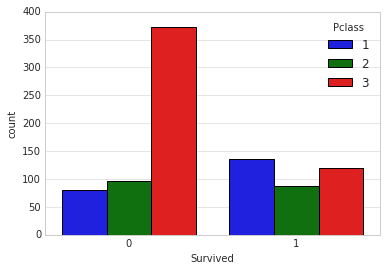

In [12]:
sns.countplot(x='Survived',hue='Pclass', data=trainDF)

Here we can see that the majority of the first class survived while a majority of the 3rd class perished.

Lets look at the fare distribution.

(array([ 385.,  177.,  139.,   31.,   41.,   26.,   31.,    8.,   11.,
           4.,    7.,    9.,    2.,    0.,    0.,    0.,    4.,    5.,
           0.,    2.,    6.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    3.]),
 array([   0.     ,   12.80823,   25.61646,   38.42469,   51.23292,
          64.04115,   76.84938,   89.65761,  102.46584,  115.27407,
         128.0823 ,  140.89053,  153.69876,  166.50699,  179.31522,
         192.12345,  204.93168,  217.73991,  230.54814,  243.35637,
         256.1646 ,  268.97283,  281.78106,  294.58929,  307.39752,
         320.20575,  333.01398,  345.82221,  358.63044,  371.43867,
         384.2469 ,  397.05513,  409.86336,  422.67159,  435.47982,
         448.28805,  461.09628,  473.90451,  486.71274,  499.52097,
         512.3292 ]),
 <a list of 40 Patch objects>)

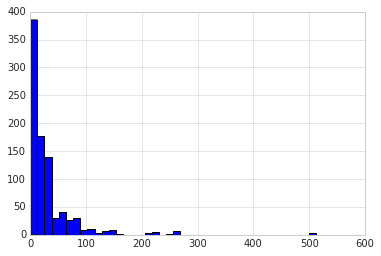

In [13]:
plt.hist(x='Fare',data=trainDF,bins=40)

Here we can see that most people paid under 50, but there are some outliers like the people at the $500 range. This is explained by the difference in the number of people in each class. The lowest class, 3, has the most people and the highest class has the least. The lowest class paid the lowest fare so there are more people in this category.

Finally, lets look at the number of missing data using a heatmap.

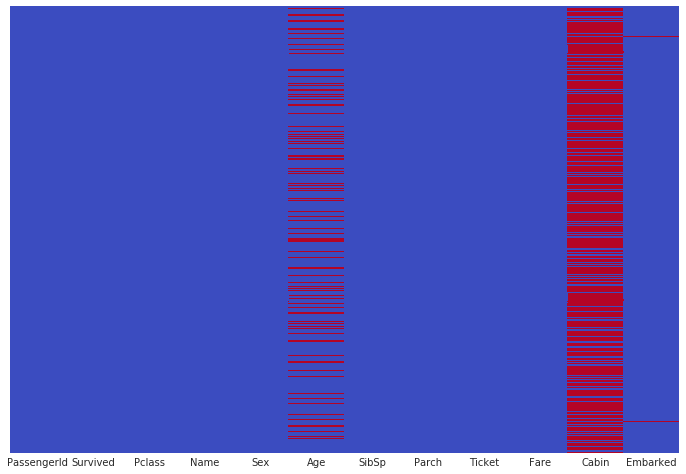

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(trainDF.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

Let's look at all the samples that have NaN values in the Pandas dataframe.

In [15]:
trainDF[(trainDF['Age'].isnull()) | (trainDF['Cabin'].isnull() ) | (trainDF['Embarked'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


Let's do the same thing with the unlabelled set. 

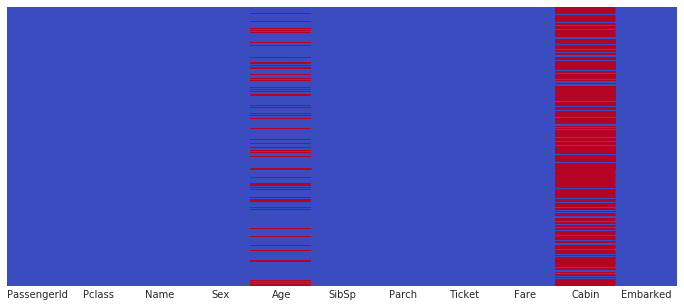

In [16]:
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(testDF.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

In [17]:
testDF[(testDF['Age'].isnull()) | (testDF['Cabin'].isnull() ) | (testDF['Embarked'].isnull())]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


## Data Cleaning

Now lets clean up the data so that it can be used with a scikit-learn model.

### Missing Data

#### Embarked Nulls

First, lets eal with the NaNs in our dataset. We'll first start with the NaNs in the Embarked feature. 

We have two passengers without locations of embarkment. Both passengers survived and have the same ticket number. They also both belonged to first class.

In [18]:
trainDF[trainDF.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Let's look at the survival chances depending on the port of embarkation.

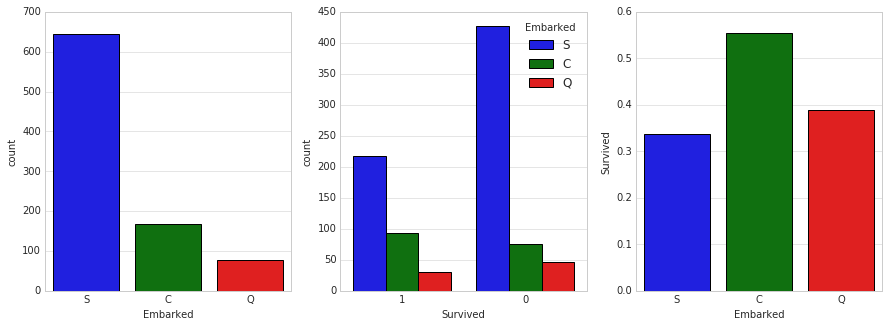

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))

# Plot the number of occurances for each embarked location
sns.countplot(x='Embarked', data=trainDF, ax=ax1)

# Plot the number of people that survived by embarked location
sns.countplot(x='Survived', hue = 'Embarked', data=trainDF, ax=ax2, order=[1,0])

# Group by Embarked, and get the mean for survived passengers for each
# embarked location
embark_pct = trainDF[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean()
# Plot the above mean
sns.barplot(x='Embarked',y='Survived', data=embark_pct, order=['S','C','Q'], ax=ax3)

Here we can see that most people embarked from S, and because of that most people that survived were S. However, when we look at the average of the number of people that survived vs. the total number of people that boarded by boarding location, S had the lowest survival rate.

This is not definitive enough to conclude which port the above people boarded on. Lets look at other variables that may indicate where passengers embarked the ship.

Lets look at if anyone else shared their ticket number.

In [20]:
trainDF.loc[trainDF['Ticket'] == '113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


There are no other users that share the same ticket number. Let's look for people of the same class that paid similar fares.

In [21]:
trainDF[(trainDF['Pclass'] == 1) & (trainDF['Fare'] > 75) & (trainDF['Fare'] < 85)].groupby('Embarked')['PassengerId'].count()

Embarked
C    16
S    13
Name: PassengerId, dtype: int64

Of the people that have the same class, and paid similar fares, 16 people embarked from C, and 13 people embarked from S.

Now, since most of the people in the same class that paid similar fares come from C, and that people that embarked from C have the highest surivival rate, we concdlue that these people likely embarked from C. We will now change their Embarked value to C.

In [22]:
# Set Value
trainDF = trainDF.set_value(trainDF['Embarked'].isnull(), 'Embarked','C')

In [23]:
# Verify
trainDF[trainDF['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


#### Fare nulls

Now let's deal with the missing values in the Fare column.

In [24]:
testDF[testDF['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


Lets visualize a histogram of the fares paid by the 3rd class pasengers who embarked from Southampton.

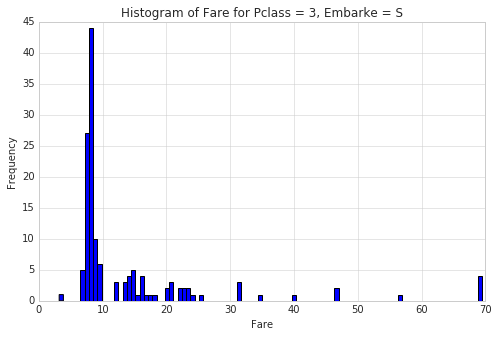

In [25]:
fig,ax = plt.subplots(figsize=(8,5))

testDF[(testDF['Pclass'] == 3) & (testDF['Embarked'] == 'S')]['Fare'].hist(bins=100, ax=ax)

plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Fare for Pclass = 3, Embarke = S')

In [26]:
print ("The top 5 most common fares:")

testDF[(testDF['Pclass'] == 3) & (testDF['Embarked'] == 'S')]['Fare'].value_counts().head()

The top 5 most common fares:


8.0500    17
7.8958    10
7.7750    10
7.8542     8
8.6625     8
Name: Fare, dtype: int64

Lets fill the missing value with the most common fare, $8.05.

In [27]:
# Fill value
testDF.set_value(testDF.Fare.isnull(), 'Fare', 8.05)
# Verify
testDF[testDF['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


#### Age nulls

Now lets fill the missing age data in the both the training and test set. One way of filling is to fill the NaNs with the means of the column. This is known as imputing. We can make this filling process more intelligent by looking at mean age by class.

In [28]:
trainDF[trainDF['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


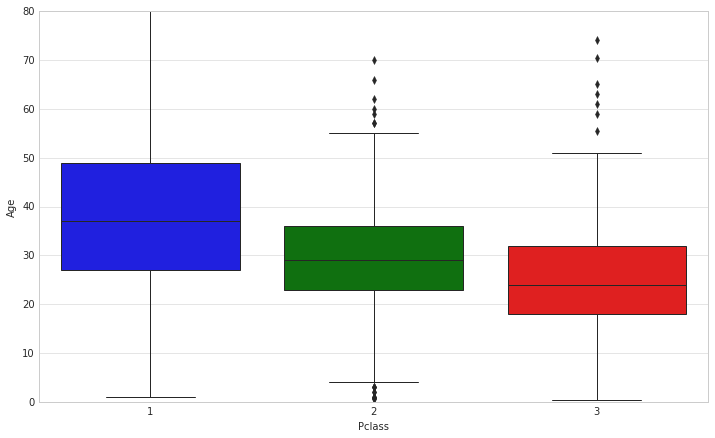

In [29]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=trainDF)

In [30]:
trainDF.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

We see that the higher the class, the higher the average age which makes sense. We can then write a function to fill the NaN age values using the above means.

In [31]:
def fixNaNAge(age, pclass):
    if age == age:
        return age
    if pclass == 1:
        return 38
    elif pclass == 2:
        return 30
    else:
        return 25

Now we will fill the age NaNs in both the training and testing dataframe and verify that they were filled correctly.

In [32]:
trainDF['Age'] = trainDF.apply(lambda row: fixNaNAge(row['Age'],row['Pclass']),axis=1)
testDF['Age'] = testDF.apply(lambda row: fixNaNAge(row['Age'],row['Pclass']), axis=1)

In [33]:
trainDF[trainDF['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [34]:
testDF[testDF['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


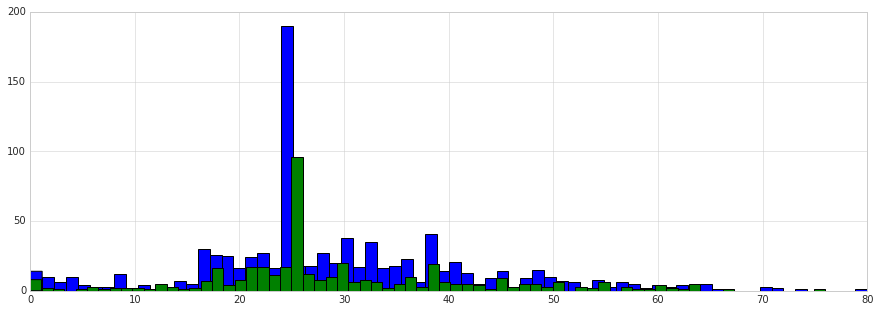

In [35]:
fig = plt.figure(figsize=(15,5))
trainDF['Age'].astype(int).hist(bins=70)
testDF['Age'].astype(int).hist(bins=70)

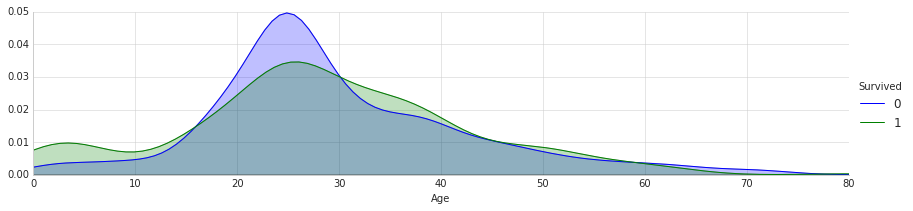

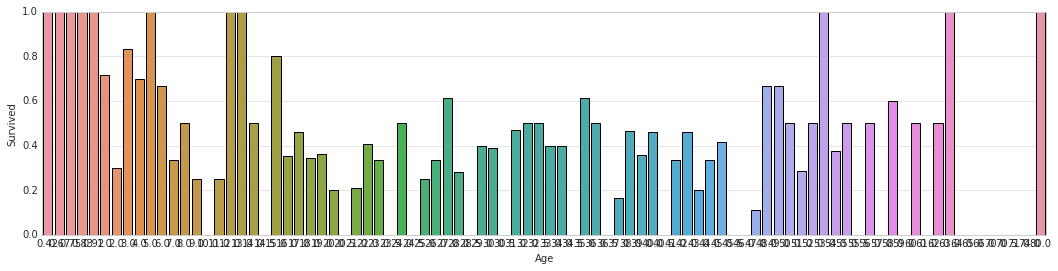

In [36]:
facet = sns.FacetGrid(trainDF, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, trainDF['Age'].max()))
facet.add_legend()

fig, ax = plt.subplots(1,1,figsize=(18,4))

age_mean = trainDF[['Age','Survived']].groupby(['Age'],as_index=False).mean()

sns.barplot(x='Age', y='Survived', data=age_mean)

#### Cabin nulls
Finally, for the cabin column, we are missing too much information to fill it properly so we can drop the feature entirely.

In [37]:
trainDF.drop('Cabin', axis=1,inplace=True)
testDF.drop('Cabin', axis=1, inplace=True)

### Adding features

The names have a prefix that, in some cases, is indicative of the social status, which may have been be an important factor in surviving the accident.
Braund, Mr. Owen Harris
Heikkinen, Miss. Laina
Oliva y Ocana, Dona. Fermina
Peter, Master. Michael J

Extracting the passenger titles and storring them in an additional column called **Title**

In [38]:
Title_Dictionary = {
    "Capt":         "Officer",
    "Col":          "Officer",
    "Major":        "Officer",
    "Jonkheer":     "Nobel",
    "Don":          "Nobel",
    "Sir" :         "Nobel",
    "Dr":           "Officer",
    "Rev":          "Officer",
    "the Countess": "Nobel",
    "Dona":         "Nobel",
    "Mme":          "Mrs",
    "Mlle":         "Miss",
    "Ms":           "Mrs",
    "Mr" :          "Mr",
    "Mrs" :         "Mrs",
    "Miss" :        "Miss",
    "Master" :      "Master",
    "Lady" :        "Nobel"
}

In [39]:
trainDF['Title'] = trainDF['Name'].apply(lambda x: Title_Dictionary[x.split(',')[1].split('.')[0].strip()])
testDF['Title'] = testDF['Name'].apply(lambda x: Title_Dictionary[x.split(',')[1].split('.')[0].strip()])

trainDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


## Aggregating Features

Lets add a field FamilySize that aggregates the information in the fields indicating the presence of a partner (Parch) or a relative (Sibsp).

In [40]:
trainDF['FamilySize'] = trainDF['SibSp'] + trainDF['Parch']
testDF['FamilySize'] = testDF['SibSp'] + testDF['Parch']

trainDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0


The gender of a passenger is an important factor in surviving the accident. So is the passenger's age (e.g. preferential treatment given to woman and children). Let us introduce a new feature to take into account the gender and age of the passengers.

In [41]:
def getPerson(passenger):
    age, sex = passenger
    return 'child' if age < 16 else sex

In [42]:
trainDF['Person'] = trainDF[['Age', 'Sex']].apply(getPerson, axis=1)
testDF['Person'] = testDF[['Age', 'Sex']].apply(getPerson, axis=1)

trainDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,1,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0,male


## Dropping Useless Features
Now let's drop the features that are no longer of interest since they don't show anything discrenable or they've been aggregating into another feature. 

The features that we will be dropping are PassengerID, Name, Sex, Ticket, SibSp, Parch.

In [43]:
features_to_drop = ['PassengerId','Name','Sex','Ticket','SibSp','Parch']

trainDF.drop(labels=features_to_drop, axis=1, inplace=True)
testDF.drop(labels=features_to_drop, axis=1, inplace=True)

trainDF.head()

,Survived,Pclass,Age,Fare,Embarked,Title,FamilySize,Person
0,0,3,22.0,7.2500,S,Mr,1,male
1,1,1,38.0,71.2833,C,Mrs,1,female
2,1,3,26.0,7.9250,S,Miss,0,female
3,1,1,35.0,53.1000,S,Mrs,1,female
4,0,3,35.0,8.0500,S,Mr,0,male


## Convert Categorical Variables

Categorical variables needs to be converted into numerical values since scikit-learn only takes numerical values as input in a numpy array. 

We could represent categorical values using numbers, but this encoding implies an **ordered relationship** between the values in the category. To avoid this, we can encode categorical values using dummy variables.

The four categorical features we have are Pclass, Embarked, Title, and Person. We can convert these via onehotencoding where each category for each feature becomes a new column. A category's column will get a value of 1 if the original feature belonged to that category. Only one of the categorical feature columns can have of 1.

In [44]:
# Create dummy features for each categorical feature
dummies_person_train = pd.get_dummies(trainDF['Person'], prefix='Person')
dummies_embarked_train = pd.get_dummies(trainDF['Embarked'], prefix='Embarked')
dummies_title_train = pd.get_dummies(trainDF['Title'], prefix='Title')
dummies_pclass_train = pd.get_dummies(trainDF['Pclass'], prefix='Pclass')

# Add the new features to the dataframe via concating
tempDF = pd.concat([trainDF, dummies_person_train, dummies_embarked_train, dummies_title_train, dummies_pclass_train], axis=1)

# Drop the original categorical feature columns
tempDF = tempDF.drop(['Person','Embarked','Title','Pclass'],axis=1)

# Drop one of each of the dummy variables because its value is implied
# by the other dummy variable columns
# E.g. if Person_male = 0, and Person_female = 0, then the person
# is a child

trainDF = tempDF.drop(['Person_child','Embarked_C','Title_Master','Pclass_1'],axis=1)
trainDF.head()

,Survived,Age,Fare,FamilySize,Person_female,Person_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Nobel,Title_Officer,Pclass_2,Pclass_3
0,0,22.0,7.2500,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,38.0,71.2833,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,26.0,7.9250,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,35.0,53.1000,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,35.0,8.0500,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [45]:
# Create dummy features for each categorical feature
dummies_person_test = pd.get_dummies(testDF['Person'], prefix='Person')
dummies_embarked_test = pd.get_dummies(testDF['Embarked'], prefix='Embarked')
dummies_title_test = pd.get_dummies(testDF['Title'], prefix='Title')
dummies_pclass_test = pd.get_dummies(testDF['Pclass'], prefix='Pclass')

# Add the new features to the dataframe via concating
tempDF = pd.concat([testDF, dummies_person_test, dummies_embarked_test, dummies_title_test, dummies_pclass_test], axis=1)

# Drop the original categorical feature columns
tempDF = tempDF.drop(['Person','Embarked','Title','Pclass'],axis=1)

# Drop one of each of the dummy variables because its value is implied
# by the other dummy variable columns
# E.g. if Person_male = 0, and Person_female = 0, then the person
# is a child

testDF = tempDF.drop(['Person_child','Embarked_C','Title_Master','Pclass_1'],axis=1)
testDF.head()

,Age,Fare,FamilySize,Person_female,Person_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Nobel,Title_Officer,Pclass_2,Pclass_3
0,34.5,7.8292,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,47.0,7.0000,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,62.0,9.6875,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,27.0,8.6625,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,22.0,12.2875,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Now our data is ready for the model.

## Building a Logistic Regression Model

Let us create a function that visualizes the accuracy of the models we are building. It plots as a continuous line the mean values of the scores of the chosen estimator for two data sets, and a coloured band around the mean line, i.e., the interval (mean - standard deviation, mean + standard deviation).

plot_learning_curve() uses in turn the function sklearn.learning_curve.learning_curve(), which determines cross-validated training and test scores for different training set sizes. An (optional) cross-validation generator splits the given dataset k times in training and test data. (The default is 3-fold cross validation.) Subsets of the training set with varying sizes will be used to train the estimator and a score for each training subset size and the test set will be computed. The scores are averaged over all k runs for each training subset size.

In [46]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt

### Split the data and the labels

Lets build a model for the Titanic data. First, lets split the training set into a training and validation set, with a 70%-30% split. We do this with the train_test_split function

In [47]:
X = trainDF.drop(['Survived'],axis=1)
y = trainDF['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

### Rescaling values
Having features that have different scales can cause problems in some machine learning models since a lot of the models are based on the concept of Euclidean Distances. This means that features with greater scales would have a greater impact on the solution, then those of smaller values.

We can rectify this situation my scaling the independent values. This can be done with the scaler function. 

In [48]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Create and fit a model

Now, we can train and fit a model to the training set we created above.

In [49]:
model = LogisticRegression()    
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Validate model: Get accuracy of model on testing set

We can now use the model that we created to make predictions on the testing set we created earlier.

In [50]:
predictions = model.predict(X_test)
    
TN = confusion_matrix(y_test, predictions)[0][0]
FP = confusion_matrix(y_test, predictions)[0][1]
FN = confusion_matrix(y_test, predictions)[1][0]
TP = confusion_matrix(y_test, predictions)[1][1]
total = TN + FP + FN + TP
ACC = (TP + TN) / float(total)

print ("This model got an accuracy of {}% on the testing set".format(round(ACC*100,2)))   

This model got an accuracy of 80.22% on the testing set


### Evaluation: Cross Validation

The above method of training and testing a model doesn't really show how well the model performs. When building a model, we want one that can generalize (low bias), and have similar accuracies across testing sets (low variance). However, we are lacking training and testing data.

A better method than the above for validating a model is to use cross-validation. In cross-validation, we partition the training set into various training and testing sets and we use these sets to train and test the model multiple times.

Variations include Leave One Out Cross Validation, KFold Cross Validation, etc.

KFold Cross Validation is a common method where the training set is split into k equal sizes. Then of the k subsamples, a single sample is used for testing, and the remaining k-1 samples are used for training. This process continues k times, and each time a different sample is used for testing. This results in each sample being tested once. At the end of this we get 10 accuracies for the model and, from this, we can get the average accuracy, and the standard deviation of the accuracy. The higher the average accuracy, the lower the bias. The lower the standard deviation, the lower the variance. This better represents the true performance of the model on the training set.

In [51]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

accuracy = np.zeros(10)
np_idx = 0

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    TN = confusion_matrix(y_test, predictions)[0][0]
    FP = confusion_matrix(y_test, predictions)[0][1]
    FN = confusion_matrix(y_test, predictions)[1][0]
    TP = confusion_matrix(y_test, predictions)[1][1]
    total = TN + FP + FN + TP
    ACC = (TP + TN) / float(total)
    
    accuracy[np_idx] = ACC*100
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3)))   

print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))

Fold 1: Accuracy: 0.8%
Fold 2: Accuracy: 0.865%
Fold 3: Accuracy: 0.787%
Fold 4: Accuracy: 0.865%
Fold 5: Accuracy: 0.798%
Fold 6: Accuracy: 0.798%
Fold 7: Accuracy: 0.787%
Fold 8: Accuracy: 0.798%
Fold 9: Accuracy: 0.865%
Fold 10: Accuracy: 0.865%
Average Score: 82.27%(3.495%)


Plot the mean accuracy, the "learning curve", of the classifier on both the training and validation dataset.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

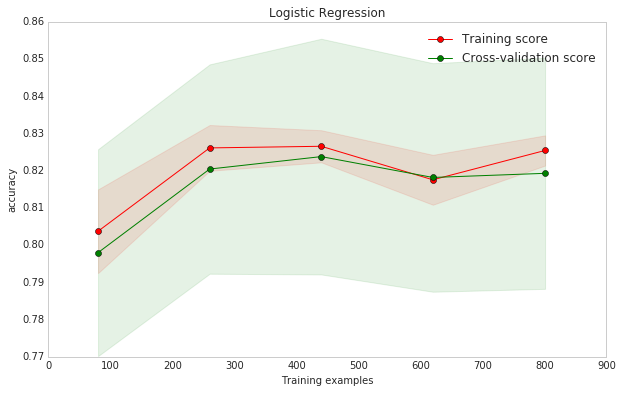

In [52]:
plot_learning_curve(model,'Logistic Regression', X, y, cv=10)

### Optimize Model: Grid Search

Grid searching is a well known method for selecting hyperparameters that optimize your model.

Grid search just builds several models with all the parameter combinations specified, and runs cross validation to return the set of parameters that had the highest cv score on the validation set.

In [53]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag']:
        
        model = LogisticRegression(C=C, solver=solver)
        accuracy = np.zeros(10)
        np_idx = 0
        
        for train_idx, test_idx in kfold.split(X):
            X_train, X_test = X.values[train_idx], X.values[test_idx]
            y_train, y_test = y.values[train_idx], y.values[test_idx]

            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            model.fit(X_train, y_train)

            predictions = model.predict(X_test)

            TN = confusion_matrix(y_test, predictions)[0][0]
            FP = confusion_matrix(y_test, predictions)[0][1]
            FN = confusion_matrix(y_test, predictions)[1][0]
            TP = confusion_matrix(y_test, predictions)[1][1]
            total = TN + FP + FN + TP
            ACC = (TP + TN) / float(total)

            accuracy[np_idx] = ACC*100
            np_idx += 1
        
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'C': 0.5, 'solver': 'newton-cg'}
Best Score: 82.718%(3.954%)

The optimal log model uses C=0.5, and a newton-cg solver, and has a cross validation score of 82.718% with a standard deviation of 3.954%


### Use Model on Unlabeled Set

Now we can train the model with optimal parameters on the entire training set and use it to make predictions on our unlabelled set.

In [54]:
model = LogisticRegression(C=best_params['C'],solver=best_params['solver'])
scaler = StandardScaler()


X_train = trainDF.drop(['Survived'],axis=1)
y_train = trainDF['Survived']

X_test = testDF

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_train)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [55]:
resultsDF = pd.read_csv('Titanic_test.csv')
resultsDF['Survived'] = pd.Series(predictions)
resultsDF[['PassengerId','Survived']].head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1
